In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
def calculate_average_colors(image_paths):
    """
    Calculate the average RGB color values for a list of images.

    Args:
        image_paths (list): List of image file paths.

    Returns:
        list: List of average color values.
    """
    average_colors = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        average_color = img.mean(axis=0).mean(axis=0)
        average_colors.append(average_color)
    return average_colors

In [3]:
def extract_red_blue_colors(average_colors):
    """
    Extract the red and blue color values from a list of average colors.

    Args:
        average_colors (list): List of average color values.

    Returns:
        tuple: Tuple of lists containing the red and blue color values.
    """
    red_values, blue_values = zip(*[(color[0], color[2]) for color in average_colors])
    return red_values, blue_values

In [4]:
def plot_color_scatter(x_c, y_c, x_m, y_m):
    """
    Plot a scatter plot of colors for Chelsea and Manchester.

    Args:
        x_c (list): List of x-axis values for Chelsea.
        y_c (list): List of y-axis values for Chelsea.
        x_m (list): List of x-axis values for Manchester.
        y_m (list): List of y-axis values for Manchester.
    """
    plt.scatter(x_c, y_c, c='b', label='Chelsea')
    plt.scatter(x_m, y_m, c='r', label='Manchester')
    plt.legend()
    plt.xlabel('Red')
    plt.ylabel('Blue')
    plt.title('Color Scatter Plot')
    plt.show()

In [5]:
def calculate_metrics(actual, predicted):
    """
    Calculate accuracy, precision, and recall based on actual and predicted labels.

    Args:
        actual (array-like): Array of actual class labels.
        predicted (array-like): Array of predicted class labels.

    Returns:
        float: Accuracy value.
        float: Precision value.
        float: Recall value.
    """
    cnf = confusion_matrix(actual, predicted)
    accuracy = np.diag(cnf).sum() / cnf.sum()
    precision = cnf[0][0] / cnf[:, 0].sum()
    recall = cnf[0][0] / cnf[0, :].sum()
    return accuracy, precision, recall

In [6]:
# Get the paths of "c" images
c_image_paths = glob.glob("data/Images/c*.jpg")

# Calculate average color values for "c" images
average_c = calculate_average_colors(c_image_paths)
x_c, y_c = extract_red_blue_colors(average_c)

# Get the paths of "m" images
m_image_paths = glob.glob("data/Images/m*.jpg")

# Calculate average color values for "m" images
average_m = calculate_average_colors(m_image_paths)
x_m, y_m = extract_red_blue_colors(average_m)

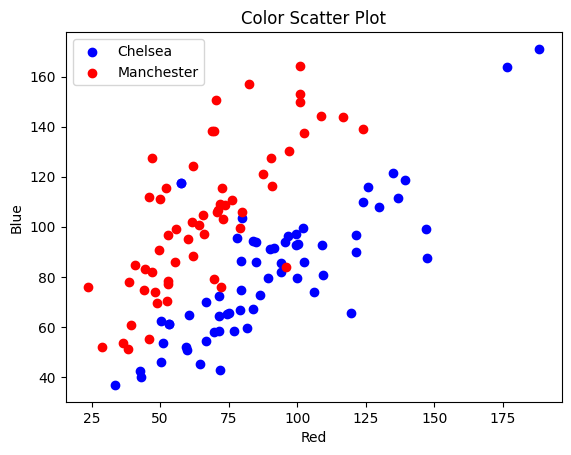

In [7]:
# Visualize the data
plot_color_scatter(x_c, y_c, x_m, y_m)

In [8]:
# Create DataFrames for Chelsea and Manchester
chelsea_data = {'red': x_c, 'blue': y_c, 'class': 0}
chelsea = pd.DataFrame(chelsea_data)

manchester_data = {'red': x_m, 'blue': y_m, 'class': 1}
manchester = pd.DataFrame(manchester_data)

# Concatenate the DataFrames
df = pd.concat([chelsea, manchester])

In [9]:
# Classify images based on color threshold
df['predict'] = np.where(df['red'] + 13 > df['blue'], 0, 1)

In [10]:
# Calculate metrics
accuracy, precision, recall = calculate_metrics(df['class'], df['predict'])

# Print the results
print('Accuracy:', accuracy * 100, '%')
print('Precision:', precision * 100, '%')
print('Recall:', recall * 100, '%')

Accuracy: 93.44262295081968 %
Precision: 93.75 %
Recall: 93.75 %
